## 1. About the task and dataset Consideration:

### 1.1. Dataset Creation:

In [1]:


train_dir = '/my_data/cats_n_dogs_small/train'
validation_dir = '/my_data/cats_n_dogs_small/validation'
test_dir = '/my_data/cats_n_dogs_small/test'

train_cats_dir = '/my_data/cats_n_dogs_small/train/cats'

train_dogs_dir = '/my_data/cats_n_dogs_small/train/dogs'
validation_cats_dir = '/my_data/cats_n_dogs_small/validation/cats'
validation_dogs_dir = '/my_data/cats_n_dogs_small/validation/dogs'

test_cats_dir = '/my_data/cats_n_dogs_small/test/cats'
test_dogs_dir = '/my_data/cats_n_dogs_small/test/dogs'


    



### 1.3. Initial Dependencies:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


## 2. Building the Model:

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## 3. Configuring the model for training:

In [4]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

## 4. Data Pre-Processing:

### 4.1. Using ImageDataGenerator to read images from directories:

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size = 20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 5. Fitting the model using Batch Generator:


In [6]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)


Epoch 1/30
100/100 [==============================] - 9s - loss: 0.6853 - acc: 0.5515 - val_loss: 0.6632 - val_acc: 0.6100
Epoch 2/30
100/100 [==============================] - 8s - loss: 0.6493 - acc: 0.6285 - val_loss: 0.6343 - val_acc: 0.6490
Epoch 3/30
100/100 [==============================] - 8s - loss: 0.6014 - acc: 0.6865 - val_loss: 0.6085 - val_acc: 0.6630
Epoch 4/30
100/100 [==============================] - 8s - loss: 0.5666 - acc: 0.7020 - val_loss: 0.5909 - val_acc: 0.6730
Epoch 5/30
100/100 [==============================] - 8s - loss: 0.5371 - acc: 0.7285 - val_loss: 0.6132 - val_acc: 0.6670
Epoch 6/30
100/100 [==============================] - 8s - loss: 0.5227 - acc: 0.7320 - val_loss: 0.5741 - val_acc: 0.6930
Epoch 7/30
100/100 [==============================] - 8s - loss: 0.4846 - acc: 0.7695 - val_loss: 0.5863 - val_acc: 0.6910
Epoch 8/30
100/100 [==============================] - 8s - loss: 0.4593 - acc: 0.7760 - val_loss: 0.5472 - val_acc: 0.7270
Epoch 9/30
100/1

## 6. Saving the model:

In [7]:
model.save('cats_n_dogs_small_1.h5')

## 7. Plotting model's loss and accuracy on training and validation set:

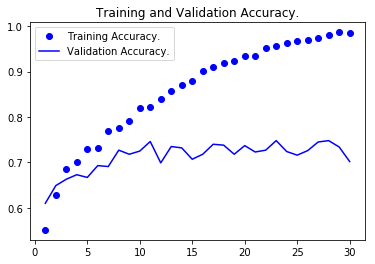

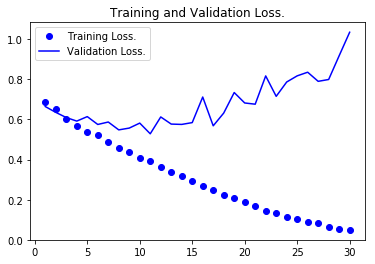

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label='Training Accuracy.')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy.')
plt.title('Training and Validation Accuracy.')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training Loss.')
plt.plot(epochs,val_loss,'b',label='Validation Loss.')
plt.title('Training and Validation Loss.')
plt.legend()

plt.show()


## 8. Re-Building Model using Data-Augmentation Drop-Out technique for mitigating Over-fitting:

In [9]:
model_1 = models.Sequential()
model_1.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model_1.add(layers.MaxPooling2D((2,2)))
model_1.add(layers.Conv2D(64,(3,3),activation='relu'))
model_1.add(layers.MaxPooling2D((2,2)))
model_1.add(layers.Conv2D(128,(3,3),activation='relu'))
model_1.add(layers.MaxPooling2D((2,2)))
model_1.add(layers.Conv2D(128,(3,3),activation='relu'))
model_1.add(layers.MaxPooling2D((2,2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(512,activation='relu'))
model_1.add(layers.Dense(1,activation='sigmoid'))

model_1.summary()

model_1.compile(loss='binary_crossentropy',optimizer = optimizers.RMSprop(lr=1e-4),metrics = ['acc'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## 9. Training the model using data-augmentation generator:

In [10]:
train_datagen_1 = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen_1 = ImageDataGenerator(rescale=1./255)
train_generator_1 = train_datagen_1.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode = 'binary')
validation_generator_1 = test_datagen_1.flow_from_directory(validation_dir,target_size=(150,150),batch_size=32,class_mode='binary')
history_1 = model_1.fit_generator(train_generator_1,steps_per_epoch=100,epochs=100,validation_data=validation_generator_1,validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 25s - loss: 0.6925 - acc: 0.5209 - val_loss: 0.6814 - val_acc: 0.5197
Epoch 2/100
100/100 [==============================] - 23s - loss: 0.6740 - acc: 0.5772 - val_loss: 0.6542 - val_acc: 0.6108
Epoch 3/100
100/100 [==============================] - 23s - loss: 0.6701 - acc: 0.5897 - val_loss: 0.6444 - val_acc: 0.6244
Epoch 4/100
100/100 [==============================] - 23s - loss: 0.6487 - acc: 0.6166 - val_loss: 0.6391 - val_acc: 0.6121
Epoch 5/100
100/100 [==============================] - 23s - loss: 0.6320 - acc: 0.6331 - val_loss: 0.6040 - val_acc: 0.6643
Epoch 6/100
100/100 [==============================] - 23s - loss: 0.6088 - acc: 0.6625 - val_loss: 0.5849 - val_acc: 0.6843
Epoch 7/100
100/100 [==============================] - 24s - loss: 0.5994 - acc: 0.6678 - val_loss: 0.5769 - val_acc: 0.6985
Epoch 8/100
100/100 [====================

In [2]:
acc_1 = history_1.history['acc']
val_acc_1 = history_1.history['val_acc']
loss_1 = history_1.history['loss']
val_loss_1 = history_1.history['val_loss']

epochs_1 = range(1,len(acc_1) + 1)

plt.plot(epochs_1,acc_1,'bo',label='Training Accuracy.')
plt.plot(epochs_1,val_acc_1,'b',label='Validation Accuracy.')
plt.title('Training and Validation Accuracy.')
plt.legend()

plt.figure()

plt.plot(epochs_1,loss_1,'bo',label='Training Loss.')
plt.plot(epochs_1,val_loss_1,'b',label='Validation Loss.')
plt.title('Training and Validation Loss.')
plt.legend()

plt.show()

NameError: name 'history_1' is not defined